In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [78]:
train = pd.read_csv('./movie_data/movies_train.csv')
test = pd.read_csv('./movie_data/movies_test.csv')
sub =pd.read_csv('./movie_data/submission.csv')
train.shape, test.shape, sub.shape

((600, 12), (243, 11), (243, 2))

* title : 영화의 제목
* distributor : 배급사
* genre : 장르
* release_time : 개봉일
* time : 상영시간(분)
* screening_rat : 상영등급
* director : 감독이름
* dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
* dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
* num_staff : 스텝수
* num_actor : 주연배우수
* box_off_num : 관객수

In [79]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [80]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [82]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [83]:
train.corr()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
time,1.000000,0.264675,0.306727,0.623205,0.114153,0.441452
dir_prev_bfnum,0.264675,1.000000,0.131822,0.323521,0.083818,0.283184
dir_prev_num,0.306727,0.131822,1.000000,0.450706,0.014006,0.259674
num_staff,0.623205,0.323521,0.450706,1.000000,0.077871,0.544265
num_actor,0.114153,0.083818,0.014006,0.077871,1.000000,0.111179
box_off_num,0.441452,0.283184,0.259674,0.544265,0.111179,1.000000


In [84]:
import seaborn as sns

<AxesSubplot:>

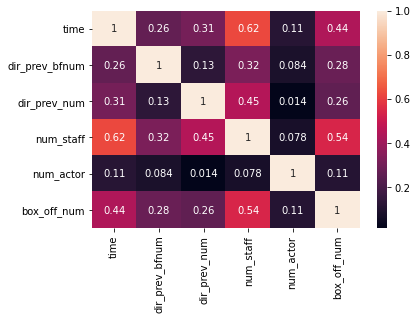

In [85]:
sns.heatmap(train.corr(), annot = True)

In [86]:
#관객수가 많은 10개 영화들을 출력
movie_best = train.sort_values(ascending = False,by = 'box_off_num').head(10)
movie_best  

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
372,국제시장,CJ 엔터테인먼트,드라마,2014-12-17,126,12세 관람가,윤제균,NaN,0,869,4,14262766
362,도둑들,(주)쇼박스,느와르,2012-07-25,135,15세 관람가,최동훈,2.564692e+06,3,462,10,12983841
530,7번방의 선물,(주)NEW,코미디,2013-01-23,127,15세 관람가,이환경,8.190495e+05,2,300,8,12811435
498,암살,(주)쇼박스,액션,2015-07-22,139,15세 관람가,최동훈,5.169479e+06,4,628,3,12706663
460,"광해, 왕이 된 남자",CJ 엔터테인먼트,드라마,2012-09-13,131,15세 관람가,추창민,1.552541e+06,2,402,3,12323595
122,변호인,(주)NEW,드라마,2013-12-18,127,15세 관람가,양우석,NaN,0,311,5,11374879
496,설국열차,CJ 엔터테인먼트,SF,2013-08-01,125,15세 관람가,봉준호,NaN,0,67,10,9350351
101,관상,(주)쇼박스,드라마,2013-09-11,139,15세 관람가,한재림,1.242778e+06,2,298,6,9135806
505,해적: 바다로 간 산적,롯데엔터테인먼트,SF,2014-08-06,130,12세 관람가,이석훈,1.843895e+06,3,868,2,8666208
476,수상한 그녀,CJ 엔터테인먼트,코미디,2014-01-22,124,15세 관람가,황동혁,2.781990e+06,2,437,5,8659725


<AxesSubplot:xlabel='num_staff', ylabel='box_off_num'>

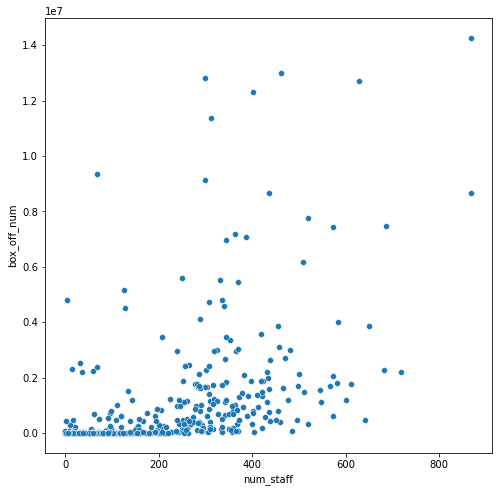

In [87]:
### 관객수와 스태프수에 대해 그래프 그려보기

plt.figure(figsize=[8,8])
sns.scatterplot(data=train, x='num_staff', y = 'box_off_num')

=> 스탭수가 많으면 관객수가 조금 많음

<AxesSubplot:xlabel='time', ylabel='box_off_num'>

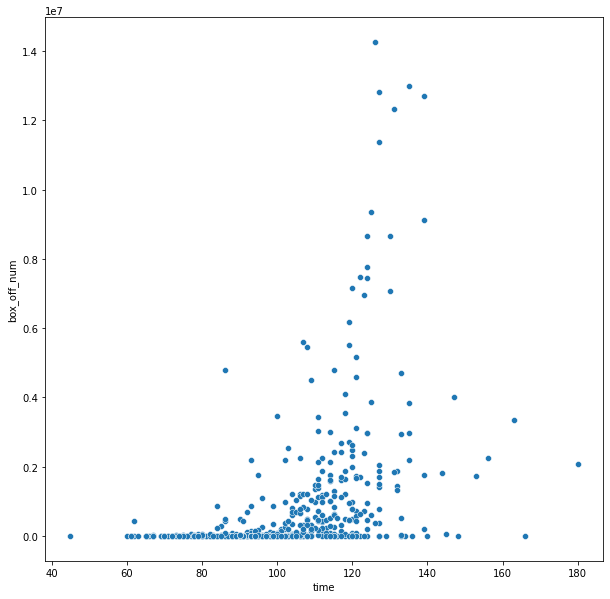

In [88]:
# 상영시간과 관객수 그래프
plt.figure(figsize=[10,10])
sns.scatterplot(data=train, x='time', y = 'box_off_num')

=> 시간 120~140분 사이에 관객수가 많음

### 데이터 시각화

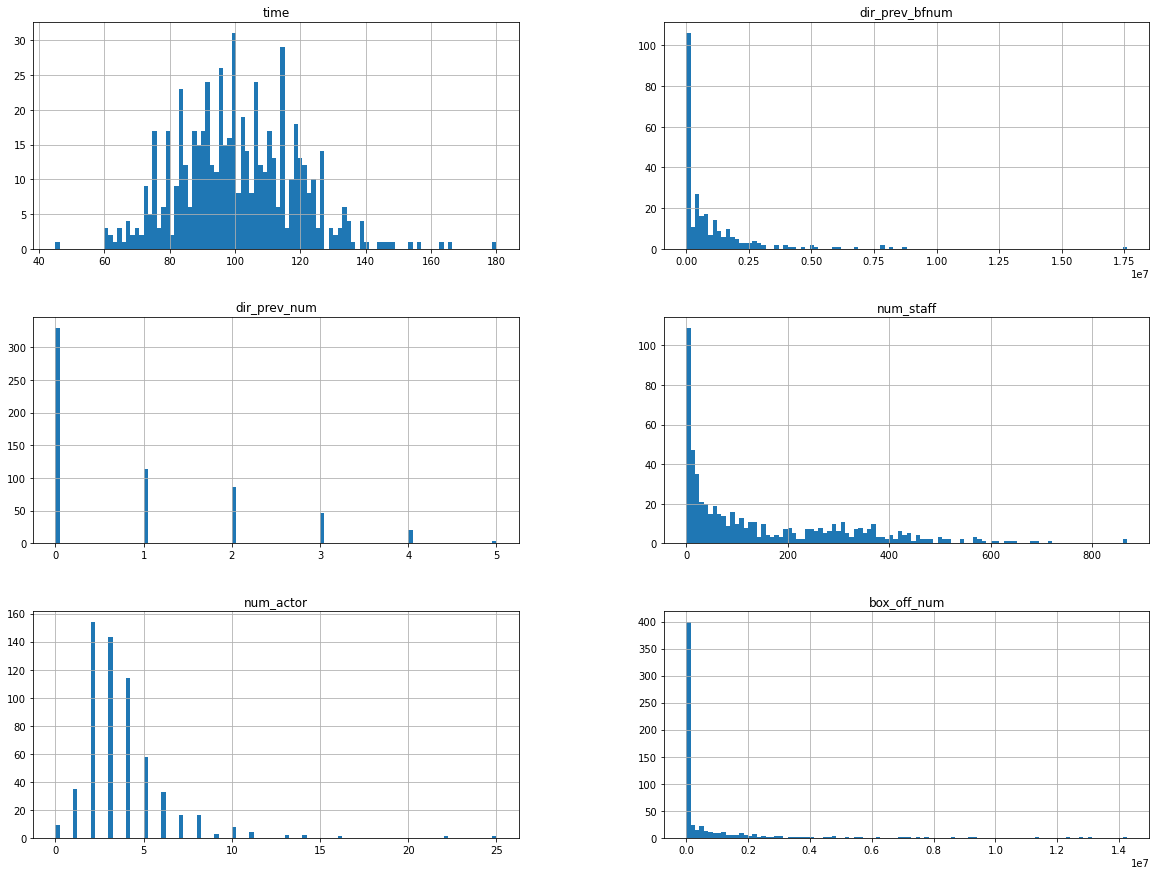

In [89]:
import matplotlib.pyplot as plt

train.hist(bins= 100, figsize = (20, 15))
plt.show()

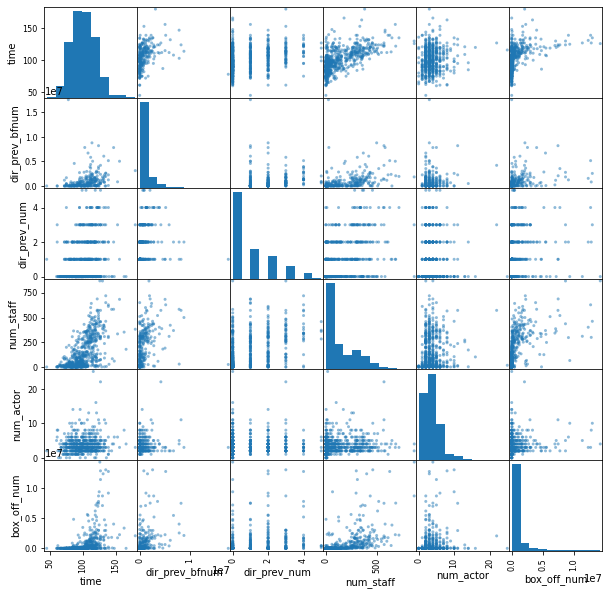

In [90]:
pd.plotting.scatter_matrix(train,figsize=(10,10))
plt.show()

### 데이터 전처리

In [91]:
# 결측치가 많은 데이터 제거
train = train.drop(['dir_prev_bfnum'],axis = 1)
test =  test.drop(['dir_prev_bfnum'],axis = 1)

In [92]:
# 감독명 : 너무 다양
train = train.drop(['director'],axis = 1)
test = test.drop(['director'],axis = 1)

In [93]:
# 제목 
train = train.drop(['title'],axis= 1)
test = test.drop(['title'],axis= 1)

In [94]:
train.distributor.value_counts()

CJ 엔터테인먼트       54
롯데엔터테인먼트        52
(주)NEW          30
(주)마운틴픽쳐스       29
인디스토리           26
                ..
상구네 필름           1
에이원 엔터테인먼트       1
전망좋은영화사          1
(주)레인보우 팩토리      1
(주)노버스엔터테인먼트     1
Name: distributor, Length: 169, dtype: int64

In [95]:
# 상위 5개의 배급사를 제외하고 '기타'로처리
distributor_list = train.distributor.value_counts()[:5]
def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

train['distributor'] = train['distributor'].apply(lambda x : func(x))
test['distributor'] = test['distributor'].apply(lambda x : func(x))

In [96]:
# 개봉일을 바탕으로 년,월 변수 생성
train['년'] = train['release_time'].apply(lambda x: int(x[:4]))
train['월'] = train['release_time'].apply(lambda x: int(x[5:7]))
train = train.drop(['release_time'],axis = 1)

test['년'] = test['release_time'].apply(lambda x: int(x[:4]))
test['월'] = test['release_time'].apply(lambda x: int(x[5:7]))
test = test.drop(['release_time'],axis = 1 )

In [97]:
train.head(3)

,distributor,genre,time,screening_rat,dir_prev_num,num_staff,num_actor,box_off_num,년,월
0,롯데엔터테인먼트,액션,96,청소년 관람불가,0,91,2,23398,2012,11
1,기타,느와르,130,청소년 관람불가,2,387,3,7072501,2015,11
2,기타,액션,123,15세 관람가,4,343,4,6959083,2013,6


In [98]:
# 원핫 인코딩
train = pd.get_dummies(train)
test = pd.get_dummies(test)

### 모델정의 및 학습

In [99]:
X_all = train.drop(['box_off_num'],axis= 1)
y = train['box_off_num']
          
print(type(X_all), type(y))
print(X_all.shape, y.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(600, 28) (600,)


In [100]:
X_all.columns

Index(['time', 'dir_prev_num', 'num_staff', 'num_actor', '년', '월',
       'distributor_(주)NEW', 'distributor_(주)마운틴픽쳐스', 'distributor_CJ 엔터테인먼트',
       'distributor_기타', 'distributor_롯데엔터테인먼트', 'distributor_인디스토리',
       'genre_SF', 'genre_공포', 'genre_느와르', 'genre_다큐멘터리', 'genre_드라마',
       'genre_멜로/로맨스', 'genre_뮤지컬', 'genre_미스터리', 'genre_서스펜스', 'genre_애니메이션',
       'genre_액션', 'genre_코미디', 'screening_rat_12세 관람가',
       'screening_rat_15세 관람가', 'screening_rat_전체 관람가',
       'screening_rat_청소년 관람불가'],
      dtype='object')

In [101]:
from sklearn.model_selection import train_test_split

X = X_all
y = train['box_off_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   random_state=0)

In [102]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 518).fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.8894753688820214
0.4132575358642978


### 학습 된 모델로 예측 데이터 생성

In [103]:
pred = model.predict(test)

#### 제출파일 생성

In [104]:
submission = pd.read_csv('./movie_data/submission.csv')
submission

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0
...,...,...
238,해에게서 소년에게,0
239,울보 권투부,0
240,어떤살인,0
241,말하지 못한 비밀,0


In [105]:
submission['box_off_num'] = pred

In [106]:
submission

,title,box_off_num
0,용서는 없다,3208469.25
1,아빠가 여자를 좋아해,1561410.01
2,하모니,1888563.56
3,의형제,1614003.09
4,평행 이론,1192645.09
...,...,...
238,해에게서 소년에게,49671.59
239,울보 권투부,2460.05
240,어떤살인,181256.71
241,말하지 못한 비밀,11339.48
